# Customers Data Analysis and Market Segmentation

In this notebook we are going to analyze the data of customers of an Online Shop and Discover any interesting behaviour of the Customers and also perform Market Segmentation on those customers.

Market segmentation is a marketing term that refers to aggregating prospective buyers into groups or segments with common needs and who respond similarly to a marketing action. Market segmentation enables companies to target different categories of consumers who perceive the full value of certain products and services differently from one another. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv('data/customer-analysis/marketing_campaign.csv', sep='\t')
print(data.shape)
data.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Let's check for any Missing Value

In [4]:
data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

From the above output we can see that we only have missing value in the Income column. Now let's find the number of missing value and see if we can drop them or fill it with some value.

In [5]:
n_missing = data.Income.isna().sum()
print("Number of Missing Income:", n_missing)

Number of Missing Income: 24


As we can see that the number of missing value in the Income column is relatively small compare to the size of our dataset. we can drop the missing value without any problem.

In [6]:
data = data.dropna()

In [7]:
data.isna().any().any()

False

## Exploratory Data Analysis

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [9]:
# View summary statistics for the categorical columns
data.select_dtypes('object').describe().T

,count,unique,top,freq
Education,2216,5,Graduation,1116
Marital_Status,2216,8,Married,857
Dt_Customer,2216,662,31-08-2012,12


<AxesSubplot:ylabel='Frequency'>

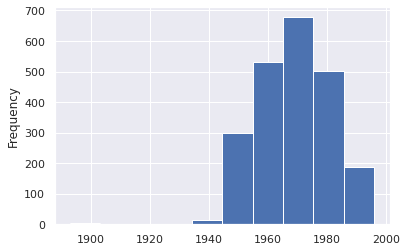

In [10]:
data['Year_Birth'].plot(kind='hist')

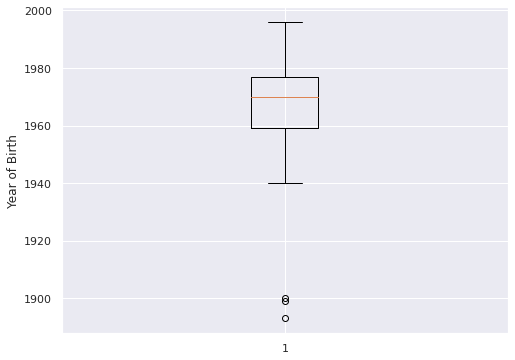

In [11]:
fig = plt.figure(figsize=(8, 6))
plt.boxplot(data['Year_Birth']);
plt.ylabel("Year of Birth");

From the above boxplot we can see that we have several outliers on our ```Year_Birth``` Column

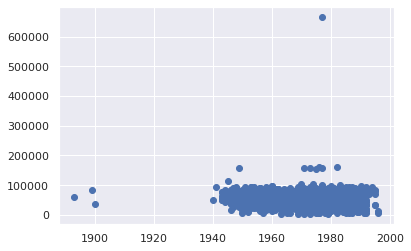

In [12]:
plt.plot(data['Year_Birth'], data['Income'], 'o')

### Analysis of Number of Customers
Perform some analysis on the number of customers based on some of the columns

In [13]:
# convert the value of 'Dt_Customer' Column to datetime object
dt_customer = pd.to_datetime(data['Dt_Customer'])

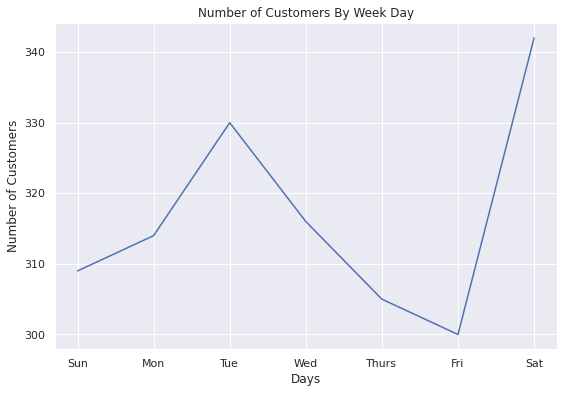

In [14]:
fig = plt.figure(figsize=(9, 6))
data.groupby(dt_customer.dt.dayofweek)['ID'].count().plot()
plt.xticks(range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat']);
plt.title("Number of Customers By Week Day")
plt.xlabel("Days")
plt.ylabel("Number of Customers");

We can observe an interesting trend from the above plot, which shows that the number of customer that get registered to the store is dependent to the day of the week. We can see that we get more customers on Saturday and Tuesday that in other days and we get the less number of customers in Friday and Thursday.

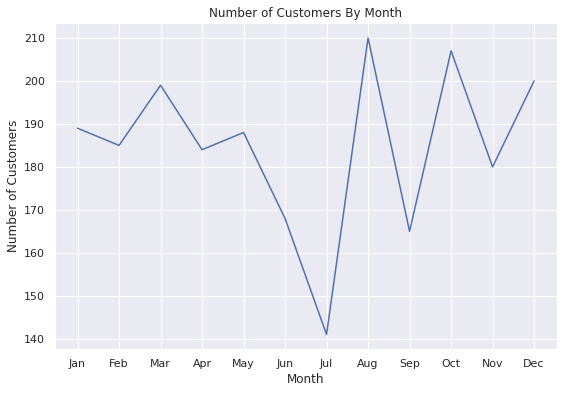

In [15]:
fig = plt.figure(figsize=(9, 6))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
data.groupby(dt_customer.dt.month)['ID'].count().plot()
plt.xticks(range(1, 13), labels=months)
plt.title("Number of Customers By Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers");

Similar to the other plot there is also a relation between number of customers registered and the month of the year. Which we can see that we get less number of Customers on July than in other months.

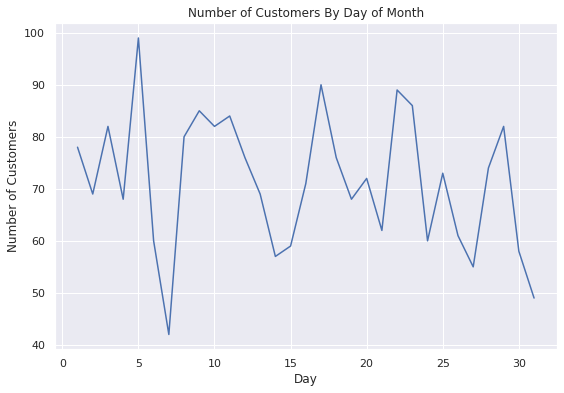

In [16]:
fig = plt.figure(figsize=(9, 6))
data.groupby(dt_customer.apply(lambda x: x.day))['ID'].count().plot()
plt.title("Number of Customers By Day of Month")
plt.xlabel("Day")
plt.ylabel("Number of Customers");

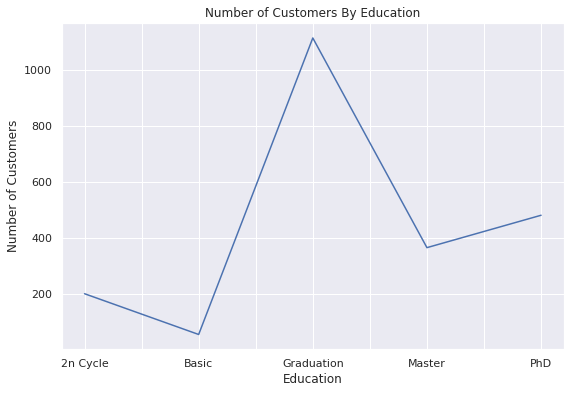

In [17]:
fig = plt.figure(figsize=(9, 6))
data.groupby(data['Education'])['ID'].count().plot()
plt.title("Number of Customers By Education")
plt.xlabel("Education")
plt.ylabel("Number of Customers");

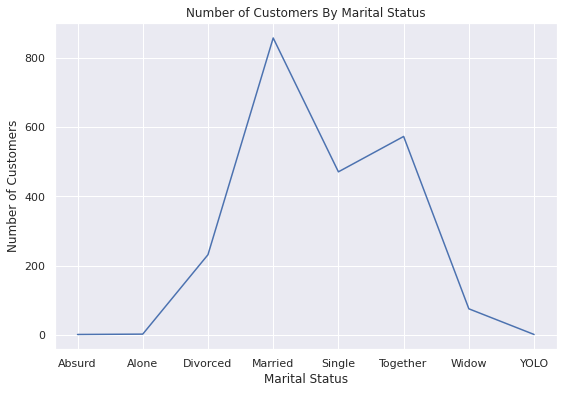

In [18]:
fig = plt.figure(figsize=(9, 6))
data.groupby(data['Marital_Status'])['ID'].count().plot()
plt.title("Number of Customers By Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers");

## Applying Unsupervised Learning

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, \
                                    MinMaxScaler, normalize, Normalizer
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.cluster import KMeans

In [20]:
def get_categorical(df):
    """
    Get all the categorical features in the dataset and also create
    a column for each of the day, month, year from Dt_Customer column 
    separately to capture the trend in the dataset based on the customer
    enrollment Date.
    """
    categorical = df.select_dtypes('object')
    
    # Drop the original Dt_Customer column
    categorical.drop('Dt_Customer', axis=1, inplace=True)

    # Create a the columns for day, month, and year
    categorical['day'] = pd.to_datetime(df['Dt_Customer']).apply(lambda x: x.dayofweek)
    categorical['month'] = pd.to_datetime(df['Dt_Customer']).apply(lambda x: x.month)
    categorical['year'] = pd.to_datetime(df['Dt_Customer']).apply(lambda x: x.year)
        
    return categorical

# Get all the numerics columns and drop the ID column
get_numerics = lambda df: df.select_dtypes('number').drop('ID', axis=1)

In [21]:
# Convert our helper functions into sklearn transformers object
# that can accept fit and tranform methods
numeric_features = FunctionTransformer(get_numerics)
categorical_features = FunctionTransformer(get_categorical)

### Dimensionality Reduction / Decomposition

The first sets of unsupervised learning algoriths that we are going to apply to our data are dimensionality reductions and decomposition. which will help us to visualize our data well and also to capture any kind of internal meaning in our data. but here we are going to use it to visualize our data.

#### PCA
We are going to start which Principle Component Analysis (PCA) which is a simple but powerful unsupervised learning algorithm used for feature extraction and data visualization for both small and large dataset. PCA tries to decompose the data into a  specific number of components.

In [22]:
numerical_pipeline = Pipeline([
    ('get_features', numeric_features),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ('get_features', categorical_features),
    ('encoder', OneHotEncoder())
])

In [23]:
pca_pipeline = Pipeline([
    ('union', FeatureUnion([
        ('numerical', numerical_pipeline),
        ('categorical', categorical_pipeline)]
    )),
    # since pca does not accept sparse_matrix we are going to use TruncatedSVD
    # which works as PCA but accept a sparse_matrix
    ('pca', TruncatedSVD(2))
])

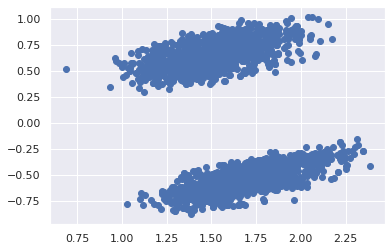

In [24]:
pca_features = pca_pipeline.fit_transform(data)
plt.scatter(pca_features[:, 0], pca_features[:, 1]);

PCA make an excellent job by trying to compose our data into two seperate groups which give us a hint that a simple clustering algorithm can be applied to get the desired clusters. but we are not going to stop here let's apply other aalgorithms.

#### TSNE
T-SNE is another unsupervised algorithms mainly used for data visualization unlike PCA which can be used for several purpose.

In [25]:
tsne_pipeline = Pipeline([
    ('union', FeatureUnion([
        ('numerical', numerical_pipeline),
        ('categorical', categorical_pipeline)]
    )),
    ('nmf', TSNE(random_state=10))
])

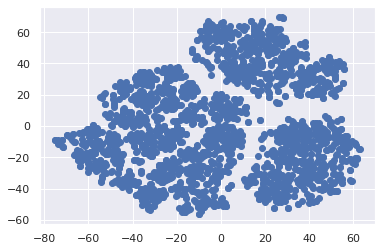

In [26]:
tsne_features = tsne_pipeline.fit_transform(data)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1]);

As opposed to PCA t-sne divide the data into 3 separate groups which might make sense. but let's apply another algorithm.

#### NMF
NMF works pretty well like PCA but only accepts a non-negative features and also have components that are much more explainable than that of PCA.

In [27]:
from sklearn.decomposition import NMF

In [28]:
nmf_pipeline = Pipeline([
    ('union', FeatureUnion([
        ('numerical', numerical_pipeline),
        ('categorical', categorical_pipeline)]
    )),
    ('nmf', NMF(n_components=2, random_state=10))
])

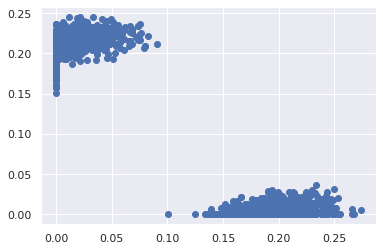

In [29]:
nmf_features = nmf_pipeline.fit_transform(data)
plt.scatter(nmf_features[:, 0], nmf_features[:, 1]);

As with PCA NMF as separate the data into 2 distinct groups.

##### Conclusion
All the three algorithms applied to the data works pretty well, but two of the algorithms suggest that the datasets contains  two separate clusters while the other suggest 3, we are going to pick two clusters. and later we are going to apply clustering algorithms to get the cluster for each invidual entry in our dataset.

### Clustering
Clustering algorithms are some class of unsupervised learning algorithms that tries to divide the dataset into several clusters by observing some properties of the data.

#### Kmeans


In [30]:
kmeans_pipeline = Pipeline([
    ('union', FeatureUnion([
        ('numerical', numerical_pipeline),
        ('categorical', categorical_pipeline)]
    )),
    ('kmeans', KMeans(n_clusters=2, random_state=10))
])

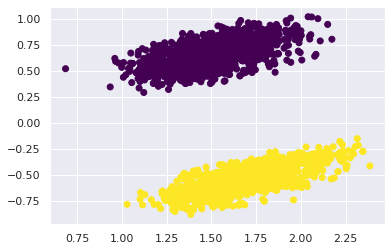

In [31]:
labels = kmeans_pipeline.fit_predict(data)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis');

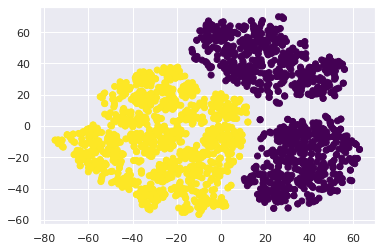

In [32]:
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis')

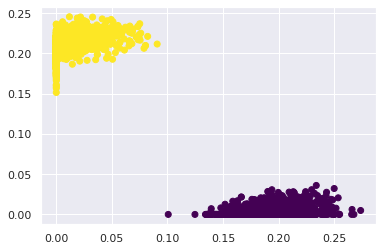

In [33]:
plt.scatter(nmf_features[:, 0], nmf_features[:, 1], c=labels, cmap='viridis')

Across all the representation of our dataset Kmeans separate all the individual clusters correctly and also even the t-sne representation with divides the data into 3 groups kmeans divide it into two clusters by merging one cluster into another correctly and leaving the other big cluster as a single cluster.

#### Hierrarchical Clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
categorical_pipeline = Pipeline([
    ('get_features', categorical_features),
    ('encoder', OneHotEncoder(sparse=False))
])

agg_pipeline = Pipeline([
    ('union', FeatureUnion([
        ('numerical', numerical_pipeline),
        ('categorical', categorical_pipeline)]
    )),
    ('kmeans', AgglomerativeClustering(n_clusters=2))
])
labels_agg = agg_pipeline.fit_predict(data)

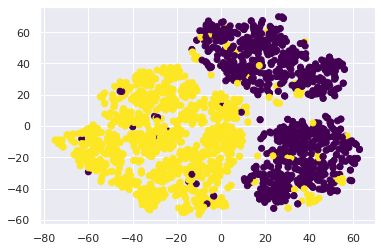

In [36]:
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels_agg, cmap='viridis')

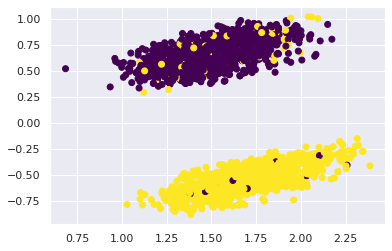

In [37]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_agg, cmap='viridis')

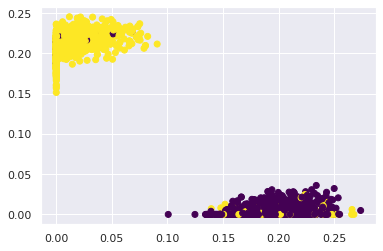

In [38]:
plt.scatter(nmf_features[:, 0], nmf_features[:, 1], c=labels_agg, cmap='viridis')

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
categorical_pipeline = Pipeline([
    ('get_features', categorical_features),
    ('encoder', OneHotEncoder())
])

dbscan_pipeline = Pipeline([
    ('union', FeatureUnion([
        ('numerical', numerical_pipeline),
        ('categorical', categorical_pipeline)]
    )),
    ('kmeans', DBSCAN(min_samples=1))
])
labels_dbscan = dbscan_pipeline.fit_predict(data)

In [ ]:
labels_dbscan

array([   0,    1,    2, ..., 2001, 2002, 2003])

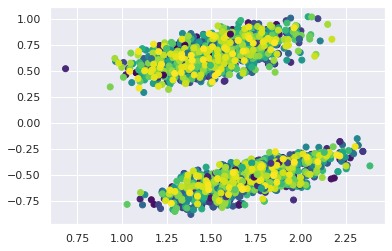

In [ ]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_dbscan, cmap='viridis')

#### Conclusion
As opposed to our first clustering algorithm (Kmeans), the other clustering algorithm also tried to clustered the data into two distinct clusters but include some mis-clustered points, which leads us to choosing Kmeans as our final clustering algorithm to use.